If the accuracy graph is not steep, increase the learning rate to speed up the learning

If the model is overfitting, reduce the size of the net by
1. reducing the number of layers
2. reducing the number of epocs


In [1]:
from keras.datasets import reuters
from keras import models, layers, optimizers, losses, metrics
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:
(train_data,train_labels), (test_data,test_labels)=reuters.load_data(num_words=10000)

In [3]:
print(train_data.shape)
print(train_labels.shape)
print(train_data[0])
print(train_labels[0])

print(test_data.shape)
print(test_labels.shape)

print(test_data[0])
print(min(test_labels))

(8982,)
(8982,)
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3
(2246,)
(2246,)
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 5

In [4]:
print(len(train_data[1])) #input length are not the same
print(len(train_data[2]))
print(type(train_data[2]))

56
139
<class 'list'>


In [5]:
word_index = reuters.get_word_index()

In [6]:
reverse_word_index=dict([(value,key) for key, value in word_index.items()])
sample_index = 1
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[sample_index]])
print(decoded_review)
print(train_labels[sample_index])

? generale de banque sa lt ? br and lt heller overseas corp of chicago have each taken 50 pct stakes in ? company sa ? factors generale de banque said in a statement it gave no financial details of the transaction sa ? ? turnover in 1986 was 17 5 billion belgian francs reuter 3
4


In [7]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [8]:
print(x_train[0])
print(y_train[0])

print(x_train.shape)

[0. 1. 1. ... 0. 0. 0.]
3.0
(8982, 10000)


In [9]:
x_val = x_train[7000:]
partial_x_train=x_train[:7000]

y_val = y_train[7000:]
partial_y_train=y_train[:7000]

In [10]:
print(x_val.shape, partial_x_train.shape)

(1982, 10000) (7000, 10000)


In [11]:
model = models.Sequential()

model.add(layers.Dense(units=92, activation="tanh", input_shape=(10000,)))
# model.add(layers.Dense(units=16, activation="tanh", input_shape=(10000,)))
# model.add(layers.Dense(units=512, activation="tanh"))
model.add(layers.Dense(units=46, activation="softmax"))

model.summary()

# model.compile(optimizer=optimizers.RMSprop(lr=0.0001),
#               loss= losses.binary_crossentropy,
#               metrics=[metrics.binary_accuracy]
#              )

model.compile(optimizer="rmsprop",
              loss= losses.sparse_categorical_crossentropy,
              metrics=["accuracy"]
             )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 92)                920092    
_________________________________________________________________
dense_2 (Dense)              (None, 46)                4278      
Total params: 924,370
Trainable params: 924,370
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(
    partial_x_train, partial_y_train,
    epochs=8,
    batch_size=250,
    validation_data=(x_val,y_val)
)

Train on 7000 samples, validate on 1982 samples
Epoch 1/8
7000/7000 [==============================] - 1s 168us/step - loss: 1.9460 - acc: 0.6161 - val_loss: 1.3171 - val_acc: 0.7281
Epoch 2/8
7000/7000 [==============================] - 1s 119us/step - loss: 1.0246 - acc: 0.7834 - val_loss: 1.0415 - val_acc: 0.7765
Epoch 3/8
7000/7000 [==============================] - 1s 118us/step - loss: 0.6967 - acc: 0.8677 - val_loss: 0.9271 - val_acc: 0.8032
Epoch 4/8
7000/7000 [==============================] - 1s 119us/step - loss: 0.4924 - acc: 0.9086 - val_loss: 0.8592 - val_acc: 0.8138
Epoch 5/8
7000/7000 [==============================] - 1s 119us/step - loss: 0.3582 - acc: 0.9337 - val_loss: 0.8292 - val_acc: 0.8174
Epoch 6/8
7000/7000 [==============================] - 1s 119us/step - loss: 0.2690 - acc: 0.9464 - val_loss: 0.8332 - val_acc: 0.8189
Epoch 7/8
7000/7000 [==============================] - 1s 121us/step - loss: 0.2098 - acc: 0.9544 - val_loss: 0.8265 - val_acc: 0.8229
Epoch 8

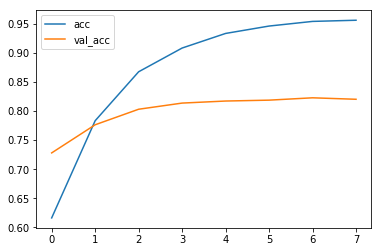

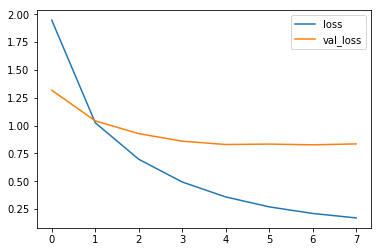

In [13]:
def plot_history(history):
    plt.plot(history["acc"], label="acc")
    plt.plot(history["val_acc"], label="val_acc")
    plt.legend()
    plt.show()
    plt.close()
    
    plt.plot(history["loss"], label="loss")
    plt.plot(history["val_loss"], label="val_loss")
    plt.legend()
    plt.show()
    plt.close()

plot_history(history.history)

In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test)

2246/2246 [==============================] - 0s 136us/step


In [15]:
print(test_loss, test_acc)

0.8745702353313578 0.807212822796082
